In [1]:
# CNN에서 필요한 라이브러리 IMPORT
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop# 평균적으로 높은 효율을 내는 알고리즘
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Dataset 디렉토리 정의
train_dir = "../data/rock_scissors_paper/train"
test_dir = "../data/rock_scissors_paper/test"

In [27]:
# ImageDataGenerator 생성
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [28]:
# ImageDataGenerator 설정
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습용 이미지를 가져올 폴더명
    classes=["rock", "scissors", "paper"], 
                                 
    target_size=(150,150),       
    batch_size=20,               
    class_mode="sparse"          
)

# ImageDataGenerator 설정
test_generator = test_datagen.flow_from_directory(
    test_dir,  # 평가용 이미지를 가져올 폴더명
    classes=["rock", "scissors", "paper"],   
                                 
    target_size=(150,150),       
    batch_size=20,               
    class_mode="sparse"        
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [29]:
# CNN Model 구현
model = Sequential()

model.add(Input(shape=(150, 150, 3)))  # 입력 정의
# Conv Block 1
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 4
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Fully Connection(DNN)의 input_layer
# FC + Dropout
model.add(Flatten())  # 전체 데이터를 4차원에서 2차원으로 변경
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # 과적합 방지

# 출력층 (binary classification)
model.add(Dense(3, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,454,147 (13.18 MB)

 Trainable params: 3,454,147 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# model이 어떻게 동작하는지를 지정
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# 설정이 다 되었으면 모델을 학습.
hist = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),  # 전체 데이터 / 배치 사이즈
    epochs=20,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 128ms/step - accuracy: 0.5443 - loss: 0.9454 - val_accuracy: 0.6774 - val_loss: 0.8032
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9471 - loss: 0.1996 - val_accuracy: 0.7903 - val_loss: 0.3934
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9878 - loss: 0.0489 - val_accuracy: 0.8978 - val_loss: 0.2814
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9959 - loss: 0.0168 - val_accuracy: 0.8925 - val_loss: 0.3312
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 126ms/step - accuracy: 0.9984 - loss: 0.0061 - val_accuracy: 0.9113 - val_loss: 0.2946
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 0.8978 - val_loss: 0.3113
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 0.9990 - loss: 0.0031 - val_accuracy: 0.8817 - val_loss: 0.3928
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - accuracy: 1.0000 - loss: 6

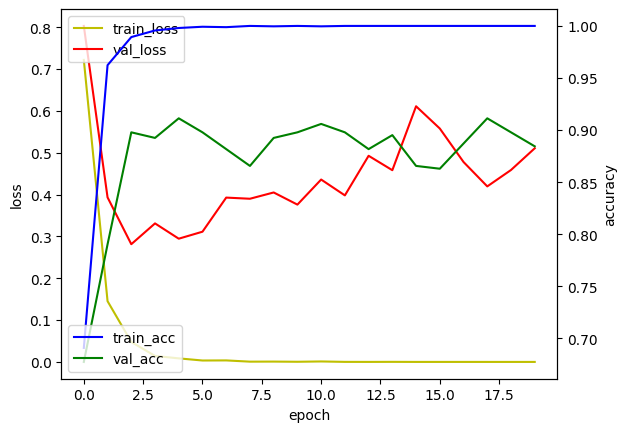

In [33]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history["loss"], "y", label="train_loss")
loss_ax.plot(hist.history["val_loss"], "r", label="val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc="upper left")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history["accuracy"], "b", label="train_acc")
acc_ax.plot(hist.history["val_accuracy"], "g", label="val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc="lower left")

In [34]:
score = model.evaluate(test_generator)
print(score)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8933 - loss: 0.5067
[0.5107287168502808, 0.8844085931777954]


In [35]:
print(train_generator.classes.shape)

(2520,)


In [28]:
validation_dir = "./MNIST/cats_and_dogs/validation"
validation_datagen = ImageDataGenerator(rescale=1/255)
# ImageDataGenerator 설정
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # 평가용 이미지를 가져올 폴더명
    classes=["cats", "dogs"],    # cats 폴더의 image는 label을 0으로
                                 # dogs 폴더의 image는 label을 1로 설정한다.
    target_size=(150,150),       # 이미지를 (150, 150)를 resize
    batch_size=20,               # 한번에 20개의 이미지만 가져와요!
    class_mode="binary")         # 이진분류인 경우 설정
    
score = model.evaluate(validation_generator)
print(score)

Found 1000 images belonging to 2 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 151ms/step - accuracy: 0.7246 - loss: 0.6939
[0.7050915956497192, 0.7310000061988831]


In [25]:
import numpy as np
np.unique(test_generator.classes, return_counts=True)

(array([0, 1, 2], dtype=int32), array([124, 484, 124]))